In [40]:
import os
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [50]:
DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
df = pd.read_csv(DATA_URL,
                 parse_dates=['Date'],
                 encoding="ISO-8859-1",
                 dtype={"RegionName": str,
                        "RegionCode": str},
                 error_bad_lines=False)
df.drop(['M1_Wildcard'], axis=1, inplace = True)

In [51]:
df_full = df.copy()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98840 entries, 0 to 98839
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   CountryName                            98840 non-null  object        
 1   CountryCode                            98840 non-null  object        
 2   RegionName                             33888 non-null  object        
 3   RegionCode                             33888 non-null  object        
 4   Jurisdiction                           98840 non-null  object        
 5   Date                                   98840 non-null  datetime64[ns]
 6   C1_School closing                      94455 non-null  float64       
 7   C1_Flag                                71484 non-null  float64       
 8   C2_Workplace closing                   93946 non-null  float64       
 9   C2_Flag                                65003 non-null  float6

In [53]:
df['Jurisdiction'].value_counts()

NAT_TOTAL      64952
STATE_TOTAL    33888
Name: Jurisdiction, dtype: int64

In [54]:
df.sample(5)

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
63410,Palestine,PSE,NaN,NaN,NAT_TOTAL,2020-08-11,3.0,1.0,2.0,0.0,2.0,1.0,3.0,1.0,2.0,0.0,2.0,0.0,2.0,1.0,4.0,0.0,NaN,2.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,14875.0,104.0,83.33,83.33,88.10,88.10,62.22,62.22,64.10,64.10,50.0,50.0
59928,Oman,OMN,NaN,NaN,NAT_TOTAL,2020-09-28,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,4.0,1.0,0.0,NaN,98057.0,924.0,86.11,86.11,85.71,85.71,74.44,74.44,76.28,76.28,62.5,62.5
75740,Tanzania,TZA,NaN,NaN,NAT_TOTAL,2020-07-17,0.0,NaN,0.0,NaN,1.0,1.0,3.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,NaN,509.0,21.0,25.00,25.00,25.71,25.71,20.83,20.83,24.04,24.04,0.0,0.0
2004,United Arab Emirates,ARE,NaN,NaN,NAT_TOTAL,2020-08-27,2.0,1.0,0.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,0.0,NaN,1.0,0.0,2.0,0.0,NaN,2.0,0.0,0.0,2.0,1.0,3.0,2.0,0.0,0.0,3.0,1.0,0.0,NaN,68511.0,378.0,43.52,43.52,55.95,55.95,51.11,51.11,51.28,51.28,50.0,50.0
42454,Indonesia,IDN,NaN,NaN,NAT_TOTAL,2020-04-04,3.0,1.0,1.0,1.0,2.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,1.0,0.0,4.0,0.0,NaN,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,2092.0,191.0,50.93,50.93,69.05,69.05,39.44,39.44,41.67,41.67,25.0,25.0


In [55]:
df['C1_School closing'].value_counts()

3.0    41413
0.0    22971
2.0    17325
1.0    12746
Name: C1_School closing, dtype: int64

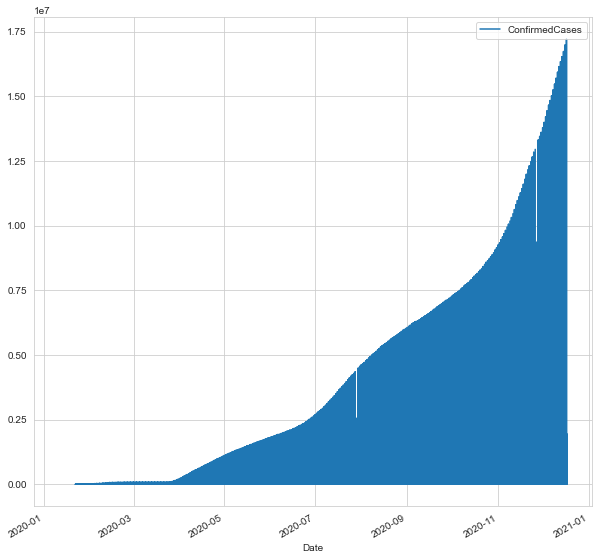

In [56]:
df.plot(x='Date',y='ConfirmedCases', figsize = (10,10))
plt.savefig('temp.png')

In [67]:
df.loc[(df.index == '2020-01-01') 
               & (df['ConfirmedCases'].isna()),'ConfirmedCases'] = 0
df['ConfirmedCases'].fillna(method = 'ffill', inplace = True)

Date
2020-01-01    0.0
2020-01-02    0.0
2020-01-03    0.0
2020-01-04    0.0
2020-01-05    0.0
Name: ConfirmedCases, dtype: float64

In [90]:
df

,Date,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,NewCases
0,2020-01-01,Aruba,ABW,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,NaN
1,2020-01-02,Aruba,ABW,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,NaN
2,2020-01-03,Aruba,ABW,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,NaN
3,2020-01-04,Aruba,ABW,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,NaN
4,2020-01-05,Aruba,ABW,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98835,2020-12-14,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11358.0,309.0,NaN,69.44,NaN,73.81,NaN,55.56,NaN,60.26,NaN,25.0,NaN
98836,2020-12-15,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11522.0,310.0,NaN,69.44,NaN,73.81,NaN,55.56,NaN,60.26,NaN,25.0,NaN
98837,2020-12-16,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11749.0,313.0,NaN,69.44,NaN,73.81,NaN,55.56,NaN,60.26,NaN,25.0,NaN
98838,2020-12-17,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11866.0,314.0,NaN,69.44,NaN,73.81,NaN,55.56,NaN,60.26,NaN,25.0,NaN


In [110]:
country_df = df[df['Jurisdiction'] == 'NAT_TOTAL']
state_df = df[df['Jurisdiction'] == 'STATE_TOTAL']

country_df.loc[:,'NewCases'] = country_df.groupby(by = 'CountryName').ConfirmedCases.diff().fillna(0)
state_df.loc[:,'NewCases'] = state_df.groupby(by = 'RegionName').ConfirmedCases.diff().fillna(0)
country_df.loc[:,'NewDeaths'] = country_df.groupby(by = 'CountryName').ConfirmedDeaths.diff().fillna(0)
state_df.loc[:,'NewDeaths'] = state_df.groupby(by = 'RegionName').ConfirmedDeaths.diff().fillna(0)

C:\Users\caell\new_Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\caell\new_Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


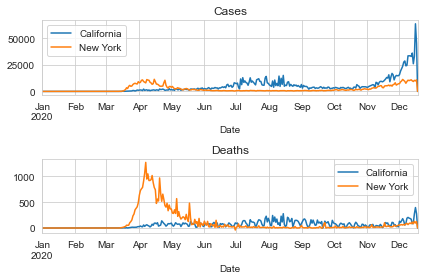

In [117]:
ax = plt.subplot(211)
ax2 = plt.subplot(212)
state_df[state_df['RegionName'] == 'California'].plot(x='Date', y='NewCases', 
                                                      ax=ax, label = 'California', title = 'Cases')
state_df[state_df['RegionName'] == 'New York'].plot(x='Date', y='NewCases', 
                                                    ax=ax, label = 'New York')

state_df[state_df['RegionName'] == 'California'].plot(x='Date', y='NewDeaths', title = 'Deaths',
                                                      ax=ax2, label = 'California')
state_df[state_df['RegionName'] == 'New York'].plot(x='Date', y='NewDeaths', 
                                                    ax=ax2, label = 'New York')
plt.tight_layout()
plt.show()

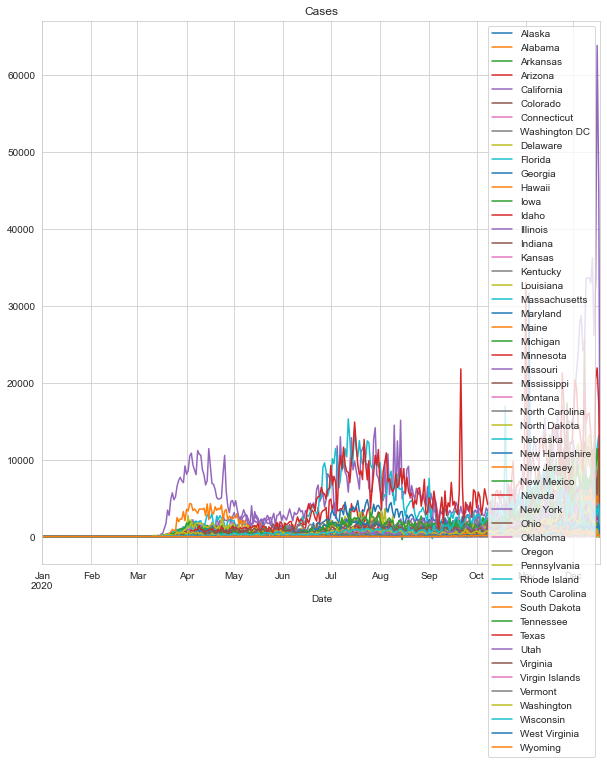

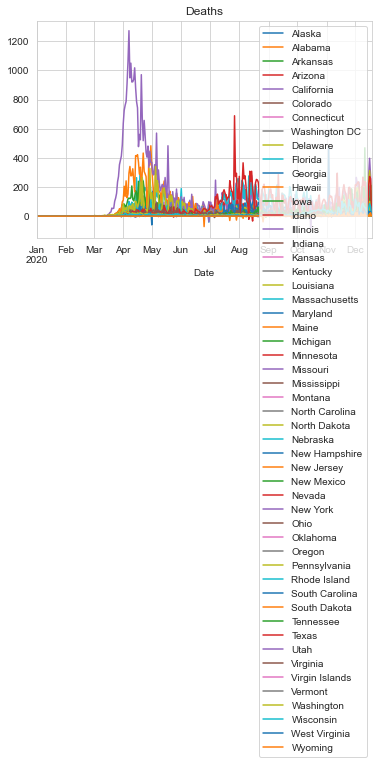

In [131]:
plt.figure(figsize = (10,10))
states = state_df[state_df['CountryName'] == 'United States'].RegionName.unique()
ax = plt.subplot(111)
for region in states:
    state_df[state_df['RegionName'] == region].plot(x='Date', y='NewCases', ax = ax,
                                                    label = region, title = 'Cases', legend = True)

plt.show()
ax = plt.subplot(111)
for region in states:
    state_df[state_df['RegionName'] == region].plot(x='Date', y='NewDeaths', ax = ax,
                                                    label = region, title = 'Deaths', legend = True)

plt.show()

In [ ]:
df.DailyChangeConfirmedCases.max()

823225.0

In [ ]:
df[df.DailyChangeConfirmedCases == df.DailyChangeConfirmedCases.max()]

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,DailyChangeConfirmedCases
70193,Turkey,TUR,Turkey,TUR,NAT_TOTAL,2020-12-10,2.0,1.0,2.0,1.0,...,62.5,72.62,72.62,66.94,66.94,63.78,63.78,87.5,87.5,823225.0


In [ ]:
df[(df.CountryCode == 'TUR') & (df.Date > "2020-12-01")][['Date','ConfirmedCases']]

,Date,ConfirmedCases
70185,2020-12-02,700880.0
70186,2020-12-03,733261.0
70187,2020-12-04,765997.0
70188,2020-12-05,797893.0
70189,2020-12-06,828295.0
70190,2020-12-07,860432.0
70191,2020-12-08,893630.0
70192,2020-12-09,925342.0
70193,2020-12-10,1748567.0
70194,2020-12-11,1780673.0
